## **Regressão Linear**


*   Marcio Rafae Buzoli - ST3004414 
*   Mineração de Dados 




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importando bibliotecas e definindo o CSV**

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dados = pd.read_csv('/content/drive/MyDrive/Faculdade/Data_Mining/FuelEconomy.csv',sep=',')

A base de dados consiste na quantidade de cavalos (HP) e a autonomia (no padrão ameicano de milhas por galão "miles per galon")

In [3]:
dados.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [4]:
dados.describe().round(2)

,Horse Power,Fuel Economy (MPG)
count,100.00,100.00
mean,213.68,23.18
std,62.06,4.70
min,50.00,10.00
25%,175.00,20.44
50%,218.93,23.14
75%,251.71,26.09
max,350.00,35.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Horse Power')

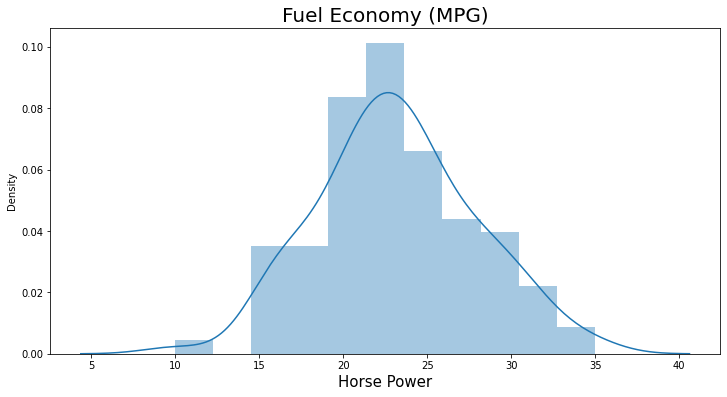

In [7]:
ax=sns.distplot(dados['Fuel Economy (MPG)'])
ax.figure.set_size_inches(12,6)
ax.set_title('Fuel Economy (MPG)',fontsize=20)
ax.set_xlabel('Horse Power',fontsize=15)

Observamos abaixo os dados dispostos em no plano cartesiano. é percpetivel a tendencia dos dados para o tracejamento de uma reta.

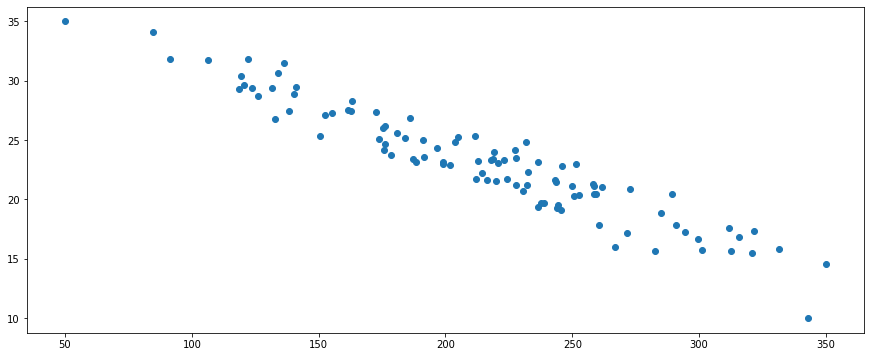

In [9]:
x = dados ["Horse Power"]
y = dados ["Fuel Economy (MPG)"]
ax = plt.scatter(x,y)
ax.figure.set_size_inches(15,6)

São diversos os atributos responsáveis pelo consumo de combustivel de um veículo, contudo o objetivo dessa base de dados é meramente didático ao analisar a potência do veículo de acordo com sua autonomia.


Definindo variáveis e importando bibliotecas de treino, aplicação e teste:

In [11]:
X = dados['Horse Power']
y = dados['Fuel Economy (MPG)']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

**Treinando** 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7, random_state=10)

In [13]:
#Array unico
X_train = X_train[:,np.newaxis] 
X_test = X_test[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Observando resultados e comparando com a resposta esperada

In [15]:
y_pred = lr.predict(X_test) 
y_pred

array([28.71388277, 23.2275261 , 25.09618703, 34.9919431 , 20.76664196,
       25.00380794, 21.42824054, 26.07065997, 27.54700708, 15.95131646,
       22.67953856, 25.80275988, 21.86481837, 20.39204962, 26.78593578,
       19.83928287, 22.08904789, 19.83085375, 25.97641208, 24.30916068,
       21.34032253, 22.39459672, 27.68096853, 22.06792805, 23.02709537,
       24.14272111, 21.72026134, 17.57108251, 18.88394976, 23.20178073,
       20.89920671, 28.57143461, 22.31003989, 20.74767422, 16.72988689,
       20.25797999, 28.97843512, 22.72813899, 25.83829128, 26.88773535,
       15.89786767, 23.15406832, 21.7372349 , 23.9624079 , 20.85402691,
       24.15649276, 24.72819375, 32.47712473, 20.45208261, 17.21203685,
       30.89968433, 20.89237123, 28.37539118, 25.23563188, 20.92753289,
       15.21784072, 19.21652155, 14.50076652, 20.34002366, 16.84072486,
       28.41376155, 29.75163415, 23.71360749, 19.66716931, 29.61738703,
       21.76354589, 23.82091155, 17.9028862 , 25.8280265 , 25.45

In [16]:
y_test

19    31.497429
14    25.341892
43    26.897067
37    35.000000
66    19.139999
        ...    
27    24.829824
88    24.826199
57    18.878350
31    26.188478
65    25.575084
Name: Fuel Economy (MPG), Length: 70, dtype: float64

Linha de tendência:

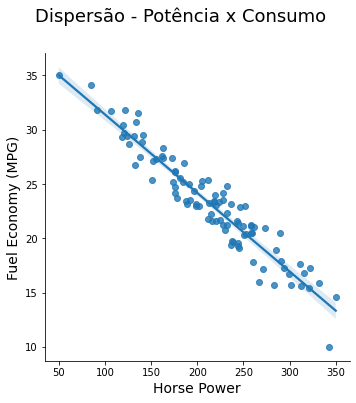

In [17]:
ax = sns.lmplot(x="Horse Power",y="Fuel Economy (MPG)",data=dados)
ax.fig.suptitle('Dispersão - Potência x Consumo',fontsize=18,y=1.1)
ax.set_axis_labels('Horse Power','Fuel Economy (MPG)',fontsize = 14)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error 

In [20]:
mse = mean_squared_error(y_test,y_pred)
print('mean square error:',mse)

mean square error: 2.0330769546735623


In [21]:
rsq = r2_score(y_test,y_pred)
print('r2_score:',rsq)

r2_score: 0.8930129366028716


O valor acima estará entre 0 e 1, este é a porcentagem de resultados que pode ser explicada pelo método implementado, os demais resultados são falhas.